In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [47]:
# Step 1: Run logistic regression
def run_logistic_regression(X, y):
    model = LogisticRegression(fit_intercept = False)
    model.fit(X, y)
    return model

# Step 2: Compute Logistic regression
def compute_if(pos_p_hats, X, index, y):
    '''
    computation of influence function for logistic regression.
    '''
    v_lst = pos_p_hats * (1 - pos_p_hats)
    V = np.diag(v_lst)
    influence_function = np.linalg.inv(X.T @ V @ X) * (y[index] - pos_p_hats[index]) * X[index][0]
    return influence_function

# First, we present an example where the sign flips upon dropping a single data point in 1D logistic regression.

In this example, the influence function approximation does predict the sign change.

In [102]:
X = np.array([-1,0,1,2,3,4]) 
X = X.reshape(-1, 1)
y = np.array([1,0,1,0,1,0])

In [103]:
model_1 = run_logistic_regression(X, y)
model_1.coef_

array([[-0.17583667]])

In [104]:
model_1.intercept_

array([0.])

In [105]:
# compute predicted values
p_hats = model_1.predict_proba(X) # (pr(Y=0), pr(Y=1))
pos_p_hats = p_hats[:,1]

In [106]:
# influence of (X, y) = (4, 0)
index=5
inf_func_4 = compute_if(pos_p_hats, X, index, y)
print(f'The influence function approximation for the change induced by dropping the point at {(X[index][0], y[index])} is {round(-inf_func_4[0][0],3)}.')


The influence function approximation for the change induced by dropping the point at (4, 0) is 0.186.


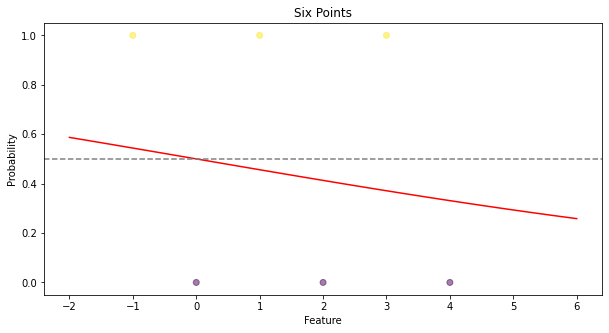

In [73]:
# Create a range of values for plotting the decision boundary
X_range = np.linspace(-2, 6, 100).reshape(-1, 1)
y_prob = model_1.predict_proba(X_range)[:, 1]  # Get the probability of the positive class

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c=y, alpha=0.5, label='Original Data')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Fit')
plt.title('Six Points')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.axhline(0.5, color='grey', linestyle='--', label='Decision Boundary (y=0.5)')
# plt.legend()
plt.show()

In [74]:
X = np.array([-1,0,1,2,3])
X = X.reshape(-1, 1)
y = np.array([1,0,1,0,1])

In [75]:
model_2 = run_logistic_regression(X, y)

In [76]:
model_2.coef_[0][0]

0.10577240208238955

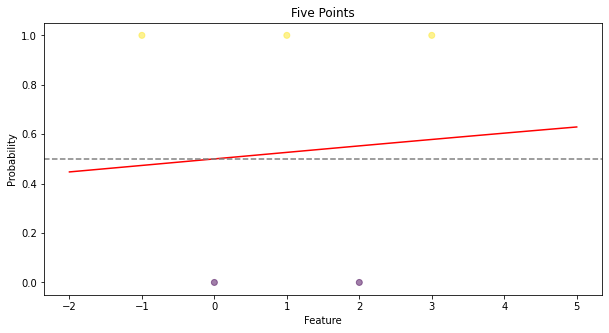

In [77]:
# Create a range of values for plotting the decision boundary
X_range = np.linspace(-2, 5, 100).reshape(-1, 1)
y_prob = model_2.predict_proba(X_range)[:, 1]  # Get the probability of the positive class

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c=y, alpha=0.5, label='Original Data')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Fit')
plt.title('Five Points')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.axhline(0.5, color='grey', linestyle='--', label='Decision Boundary (y=0.5)')
# plt.legend()
plt.show()

In [78]:
print(f'The regression coefficient for the original dataset is: {round(model_1.coef_[0][0], 3)}.')
print(f'The regression coefficient for the new dataset is: {round(model_2.coef_[0][0], 3)}.')

The regression coefficient for the original dataset is: -0.176.
The regression coefficient for the new dataset is: 0.106.


In [82]:
delta =  model_2.coef_[0][0] - model_1.coef_[0][0]
print(f'The refit value is: {round(model_2.coef_[0][0],4)}.')
print(f'The influence function approximation to refitting is: {round(model_1.coef_[0][0]-inf_func_5[0][0],4)}.')
print(f'The change in the regression coefficient from refitting is: {round(delta,4)}.')
print(f'The change in the regression coefficient by influence function approximation is: {round(-inf_func_4[0][0],4)}.')

The refit value is: 0.1058.
The influence function approximation to refitting is: 0.0104.
The change in the regression coefficient from refitting is: 0.2816.
The change in the regression coefficient by influence function approximation is: 0.1863.


In [50]:
print(f'The residual for the point at (4, 0) is {pos_p_hats[5]}.')

The residual for the point at (4, 0) is 0.33107064266127545.


The deletion of the point at (4, 0) led to a change in sign, from positive to negative. The influence function approximation underestimated but still was able to predict the sign change.

# Next, we present an example in which the influence function approximation fails to predict a sign flip upon dropping a single datapoint.

In [116]:
X = np.array([-1,0,1,2,3,40])
X = X.reshape(-1, 1)
y = np.array([1,0,1,0,1,0])

In [117]:
# with the outlier point at 40 (large covariate) the logistic regression coefficient is closer to zero.
model_3 = run_logistic_regression(X, y)
model_3.coef_

array([[-0.09315216]])

In [118]:
# compute predicted values
p_hats = model_3.predict_proba(X)
pos_p_hats = p_hats[:,1]

# influence of (X, y) = (400, 0)
inf_func_40 = compute_if(pos_p_hats, X, 5, y)
inf_func_40

array([[-0.02326194]])

In [119]:
print(f'The influence function approximation for the change induced by dropping the point at {(X[index][0], y[index])} is {round(inf_func_40[0][0],3)}.')

The influence function approximation for the change induced by dropping the point at (40, 0) is -0.023.


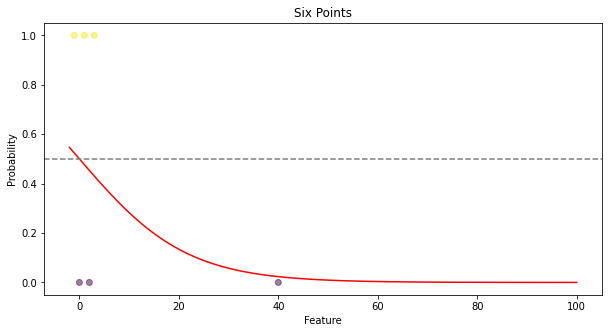

In [120]:
# Create a range of values for plotting the decision boundary
X_range = np.linspace(-2, 100, 100).reshape(-1, 1)
y_prob = model_3.predict_proba(X_range)[:, 1]  # Get the probability of the positive class

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c=y, alpha=0.5, label='Original Data')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Fit')
plt.title('Six Points')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.axhline(0.5, color='grey', linestyle='--', label='Decision Boundary (y=0.5)')
# plt.legend()
plt.show()

In [121]:
X = np.array([-1,0,1,2,3])
X = X.reshape(-1, 1)
y = np.array([1,0,1,0,1])

model_2 = run_logistic_regression(X, y)
model_2.coef_[0][0]

0.10577240208238955

In [122]:
delta_40 =  model_2.coef_[0][0] - model_3.coef_[0][0]

In [123]:
print(f'The original fit value is: {round(model_3.coef_[0][0],4)}.')
print(f'The refit value is: {round(model_2.coef_[0][0],4)}.')
print(f'The change in the regression coefficient from refitting is: {round(delta_40,4)}.')
print(f'The influence function approximation to refitting is: {round(model_3.coef_[0][0]-inf_func_40[0][0],4)}.')
print(f'The change in the regression coefficient by influence function approximation is: {round(-inf_func_40[0][0],4)}.')

The original fit value is: -0.0932.
The refit value is: 0.1058.
The change in the regression coefficient from refitting is: 0.1989.
The influence function approximation to refitting is: -0.0699.
The change in the regression coefficient by influence function approximation is: 0.0233.


The deletion of the point at (40, 0) leads to a change in sign, from negative (-0.093) to positive (0.11). The influence function approximation (0.023) majorly underestimates this change and is thus unable to predict the sign change.

Below are the values we obtain by increasing the X-value of the outlier datapoint by 10-fold (X = 40 --> X = 400).
Two notable observations: the influence function approximation decreases in magnitude (to 0).

The original fit value is: -0.0163.
The refit value is: 0.1058.
The change in the regression coefficient from refitting is: 0.1221.
The influence function approximation to refitting is: -0.0139.
The change in the regression coefficient by influence function approximation is: 0.0025.

In [ ]:
# Oct 7th: trying out different arrangements to more generally characterize the error.

In [46]:
X = np.array([-1,0,5,6,7,100]) # dragging the last point far enough, the regression will flip to a negative sign.
X = X.reshape(-1, 1)
y = np.array([0,0,1,1,1,0])

In [47]:
model_4 = run_logistic_regression(X, y)
model_4.coef_

array([[-0.02810599]])

In [48]:
# compute predicted values
p_hats = model_4.predict_proba(X)
pos_p_hats = p_hats[:,1]

In [49]:
model_4.coef_[0][0]

-0.028105992214304373

In [50]:
# influence of (X, y) = (100, 0)
inf_func_4 = compute_if(pos_p_hats, X, 5, y)
inf_func_4

array([[-0.01055523]])

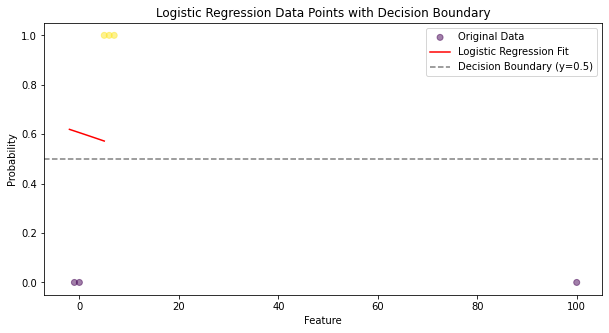

In [52]:
# Create a range of values for plotting the decision boundary
X_range = np.linspace(-2, 5, 100).reshape(-1, 1)
y_prob = model_4.predict_proba(X_range)[:, 1]  # Get the probability of the positive class

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c=y, alpha=0.5, label='Original Data')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Fit')
plt.title('Logistic Regression Data Points with Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.axhline(0.5, color='grey', linestyle='--', label='Decision Boundary (y=0.5)')
plt.legend()
plt.show()

In [83]:
# Oct 2nd: When x = 4 the sign does change (upon removing the (X, y) = (4, 0)),
# from -0.02 to 1.6e-5. the influence functiion is 0.38, so it does predict a change; it actually
# predicts a slightly larger change than the refit.

# Oct 7th: the influence function approximation for dropping the point at (4,0)
# is actually -0.184, so it does *not* predict the change! this is because 
# the magnitude of the residual (which decreases to 0) outweighs the magnitude of the X value.

# Oct 8th: there was an error in the computation of the influence function.
# (1 - \hat{p}_i) --> (y_i - \hat{p}_i). After correcting for this error, 
# we now see that the influence function underestimates the refit; in some situations,
# this leads to a failure of type 1 (i.e. the influence function approximation does not predict a sign change
# when indeed one exists.)